In [1]:
#Import required libraries
from __future__ import absolute_import, division, print_function
import pathlib
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime as dt
from keras import initializers
from keras.layers import Input, Dense
from keras.models import Model,Sequential
from keras import optimizers
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import subprocess

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
#Print the files stored in an hdfs folder
p = subprocess.Popen("hdfs dfs -ls /zc_files |  awk '{print $8}'",
    shell=True,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT)

for line in p.stdout.readlines():
    print (line)

b'\n'
b'/zc_files/carbonppm_maunaloa.csv\n'
b'/zc_files/northseaice.csv\n'
b'/zc_files/northsouthice_globaltemps1.csv\n'
b'/zc_files/seaice_and_globaltemps.csv\n'
b'/zc_files/southseaice.csv\n'


In [3]:
#Read some part of the file to get the column name
cat = subprocess.Popen(["hadoop", "fs", "-cat", "/zc_files/seaice_and_globaltemps.csv"], stdout=subprocess.PIPE)
c = 0
for line in cat.stdout:
    line = line.decode('utf-8')
    print(line)
    if c > 1:
        break
    c = c+1

Saving all output to "/Users/daveloaiza/Apps/ZeroCopy/ge-lib-zc-adapters/adapters/seaice_and_globaltemps.csv". Enter "record" with no arguments to stop it.

'Year','Month','Day','ExtentNorth','ExtentSouth','LandAverageTemperature','LandMaxTemperature'

'1978','10','26','10.231','17.624','',''



In [43]:
#Read a file and store in a dataframe
cat = subprocess.Popen(["hadoop", "fs", "-cat", "/zc_files/seaice_and_globaltemps.csv"], stdout=subprocess.PIPE)
sea_global = pd.DataFrame(columns=["Year","Month","Day","ExtentNorth","ExtentSouth","LandAverageTemperature","LandMaxTemperature"])
c = 0
for line in cat.stdout:
    line = line.decode('utf-8')
    str_line = line
    if c > 2:
        string = str_line.split(',')
        if len(string) == 7:
            sea_global.loc[len(sea_global)] = string
    c = c + 1
print(sea_global)

         Year Month   Day ExtentNorth ExtentSouth LandAverageTemperature  \
0      '1978'  '10'  '28'    '10.420'    '17.803'                     ''   
1      '1978'  '10'  '30'    '10.557'    '17.670'                     ''   
2      '1978'  '11'  '01'    '10.670'    '17.527'   '6.3500000000000005'   
3      '1978'  '11'  '03'    '10.777'    '17.486'                     ''   
4      '1978'  '11'  '05'    '10.968'    '17.343'                     ''   
5      '1978'  '11'  '07'    '11.080'    '17.157'                     ''   
6      '1978'  '11'  '09'    '11.189'    '17.028'                     ''   
7      '1978'  '11'  '11'    '11.314'    '16.815'                     ''   
8      '1978'  '11'  '13'    '11.460'    '16.371'                     ''   
9      '1978'  '11'  '15'    '11.539'    '16.176'                     ''   
10     '1978'  '11'  '17'    '11.696'    '15.520'                     ''   
11     '1978'  '11'  '19'    '11.870'    '15.267'                     ''   
12     '1978

In [6]:
#Read some part of the file to get the column name
cat = subprocess.Popen(["hadoop", "fs", "-cat", "/zc_files/carbonppm_maunaloa.csv"], stdout=subprocess.PIPE)
c = 0
for line in cat.stdout:
    line = line.decode('utf-8')
    print(line)
    if c > 1:
        break
    c = c+1

Saving all output to "/Users/daveloaiza/Apps/ZeroCopy/ge-lib-zc-adapters/adapters/carbonppm_maunaloa.csv". Enter "record" with no arguments to stop it.

'YYYY','M','DD','ppm'

'1980','9','14','336.24'



In [7]:
#Read a file and store in a dataframe
cat = subprocess.Popen(["hadoop", "fs", "-cat", "/zc_files/carbonppm_maunaloa.csv"], stdout=subprocess.PIPE)
carbon = pd.DataFrame(columns=["Year","Month","Day","PPM"])
c = 0
for line in cat.stdout:
    line = line.decode('utf-8')
    str_line = line
    if c > 2:
        string = str_line.split(',')
        if len(string) == 4:
            carbon.loc[len(carbon)] = string
    c = c + 1
print(carbon)

        Year Month   Day          PPM
0     '1980'   '9'  '28'   '335.99'\n
1     '1980'  '11'   '2'   '336.97'\n
2     '1980'  '11'  '23'   '337.64'\n
3     '1980'  '12'  '21'   '338.52'\n
4     '1980'  '12'  '28'   '338.60'\n
5     '1981'   '4'  '19'   '342.54'\n
6     '1981'   '6'  '28'   '341.71'\n
7     '1981'   '8'   '2'   '339.30'\n
8     '1981'   '8'  '16'   '338.18'\n
9     '1981'   '8'  '30'   '337.60'\n
10    '1981'   '9'  '27'   '336.24'\n
11    '1981'  '11'   '1'   '338.13'\n
12    '1981'  '11'  '22'   '339.23'\n
13    '1982'   '1'  '10'   '340.75'\n
14    '1982'   '2'  '14'   '341.34'\n
15    '1982'   '2'  '21'   '341.97'\n
16    '1982'   '3'  '14'   '342.71'\n
17    '1982'   '3'  '21'  '-999.99'\n
18    '1982'   '4'  '18'  '-999.99'\n
19    '1978'   '7'  '23'   '335.74'\n
20    '1978'   '8'   '6'   '334.64'\n
21    '1978'  '10'   '8'   '331.85'\n
22    '1978'  '12'  '10'   '334.96'\n
23    '1974'   '6'   '2'   '332.32'\n
24    '1979'   '1'  '21'   '336.93'\n
25    '1974'

In [8]:
#Carbon/PPM data analysis
carbon['Year_Month_Day'] = carbon[carbon.columns[0:3]].apply(lambda x: '-'.join(x),axis=1) #Combine year, month, day to a one column
#print(sea_ice['Year_Month_Day'])
carbon['Year_Month_Day'] = carbon['Year_Month_Day'].apply(lambda x: x.replace("'",""))
carbon['Year_Month_Day'] = pd.to_datetime(carbon['Year_Month_Day'])
carbon['Date_Num'] = carbon['Year_Month_Day'].map(dt.datetime.toordinal)
carbon['PPM'] = carbon['PPM'].apply(lambda x: x.replace("'",""))
carbon['PPM'] = carbon['PPM'].astype(float)
carbon = carbon[carbon['PPM'] > 0]



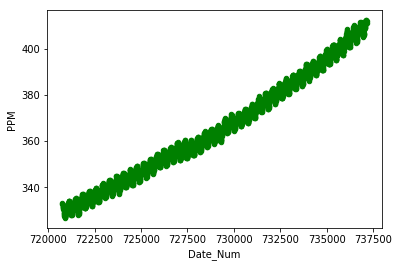

In [9]:
#Plot the result
carbon.plot(kind='scatter',x='Date_Num',y='PPM',color='green')
plt.show()

In [10]:
#Preprocessing data for ml
modified_carbon_data = carbon[['Date_Num','PPM']] #temp df
modified_carbon_data = modified_carbon_data.apply(lambda x: x/x.max(),axis = 0)
print(modified_carbon_data)

      Date_Num       PPM
0     0.980922  0.814699
1     0.980970  0.817075
2     0.980998  0.818700
3     0.981036  0.820834
4     0.981046  0.821028
5     0.981198  0.830581
6     0.981293  0.828569
7     0.981340  0.822725
8     0.981359  0.820009
9     0.981378  0.818603
10    0.981416  0.815305
11    0.981464  0.819888
12    0.981492  0.822555
13    0.981559  0.826241
14    0.981606  0.827671
15    0.981616  0.829199
16    0.981644  0.830993
19    0.979840  0.814093
20    0.979859  0.811426
21    0.979944  0.804660
22    0.980030  0.812201
23    0.977789  0.805800
24    0.980087  0.816978
25    0.977893  0.797895
26    0.980305  0.819912
27    0.977931  0.792246
28    0.980343  0.816760
29    0.980419  0.808928
30    0.978017  0.796683
31    0.980619  0.820421
...        ...       ...
2311  0.998291  0.966320
2312  0.998329  0.970757
2313  0.998367  0.975607
2314  0.998405  0.975922
2315  0.998414  0.976237
2316  0.998500  0.983633
2317  0.998595  0.988216
2318  0.998604  0.986591


In [32]:
#Keras sequential model backed by tensorflow
model = Sequential()
model.add(Dense(20, activation='tanh', input_dim=1, kernel_initializer="normal"))
model.add(Dense(1, activation='elu', kernel_initializer="normal"))
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
# Fit the model
x = modified_carbon_data['Date_Num']
y = modified_carbon_data['PPM']
model.fit(x, y, epochs=500, batch_size=10,  verbose=2)
predictions = model.predict(x)

Epoch 1/500
 - 1s - loss: 0.2012 - mean_absolute_error: 0.3186
Epoch 2/500
 - 0s - loss: 0.0028 - mean_absolute_error: 0.0456
Epoch 3/500
 - 0s - loss: 0.0028 - mean_absolute_error: 0.0456
Epoch 4/500
 - 0s - loss: 0.0028 - mean_absolute_error: 0.0456
Epoch 5/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0459
Epoch 6/500
 - 0s - loss: 0.0028 - mean_absolute_error: 0.0456
Epoch 7/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0457
Epoch 8/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0457
Epoch 9/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0457
Epoch 10/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0457
Epoch 11/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0456
Epoch 12/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0458
Epoch 13/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0456
Epoch 14/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0457
Epoch 15/500
 - 0s - loss: 0.0029 - mean_absolute_error: 0.0458
Epoch 16/500
 - 0s - loss: 0.0029 - mean_absolute

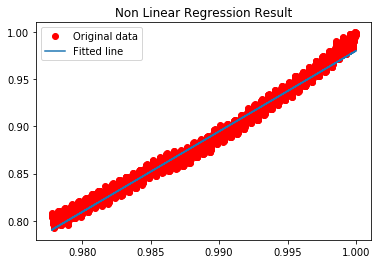

In [33]:
#Plot the result
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Non Linear Regression Result') 
plt.legend() 
plt.show() 

Given date time: 1990-01-01 00:00:00
Converted datetime to a number: 726468
1990-01-01 00:00:00  has PPM level :  [[353.19537]]


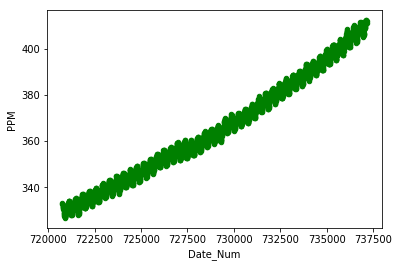

In [50]:
#Prediction with a new data
yr_mo_dy = dt.datetime(1990,1,1)
print('Given date time:',yr_mo_dy)
x = dt.datetime.toordinal(yr_mo_dy)
print('Converted datetime to a number:', x)
x_norm = x/carbon['Date_Num'].max() #Normalize x
y = model.predict([x_norm])
print(yr_mo_dy,' has PPM level : ',y*carbon['PPM'].max())
carbon.plot(kind='scatter',x='Date_Num',y='PPM',color='green')
plt.show()

In [45]:
#Climate data analysis
sea_global['Year_Month_Day'] = sea_global[sea_global.columns[0:3]].apply(lambda x: '-'.join(x),axis=1) #Combine year, month, day to a one column
#print(sea_ice['Year_Month_Day'])
sea_global['Year_Month_Day'] = sea_global['Year_Month_Day'].apply(lambda x: x.replace("'",""))
sea_global['Year_Month_Day'] = pd.to_datetime(sea_global['Year_Month_Day'])
sea_global['Date_Num'] = sea_global['Year_Month_Day'].map(dt.datetime.toordinal)
sea_global['ExtentNorth'] = sea_global['ExtentNorth'].apply(lambda x: x.replace("'",""))
sea_global['ExtentNorth'] = sea_global['ExtentNorth'].astype(float)

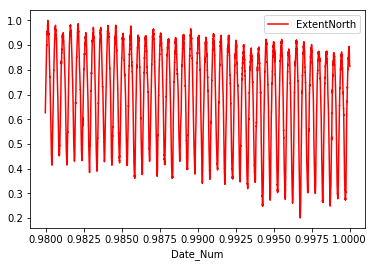

In [46]:
#Data preprocessing
modified_climate_data = sea_global[['Date_Num','ExtentNorth']] #temp df
modified_climate_data = modified_climate_data.apply(lambda x : x/x.max(),axis=0)
modified_climate_data.plot(kind='line',x='Date_Num',y='ExtentNorth',color='red')

[0.62639014 0.63462579 0.6414187  ... 0.81574992 0.81635107 0.8143673 ]
9187
Train Data Set


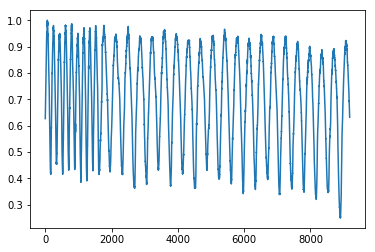

Test Data Set


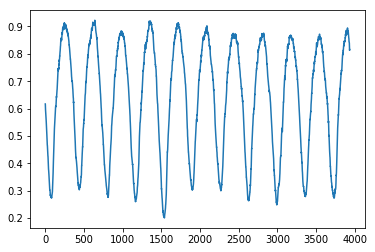

Epoch 1/10
 - 43s - loss: 0.0082
Epoch 2/10
 - 41s - loss: 4.5400e-05
Epoch 3/10
 - 41s - loss: 4.5010e-05
Epoch 4/10
 - 43s - loss: 4.5083e-05
Epoch 5/10
 - 37s - loss: 4.4907e-05
Epoch 6/10
 - 38s - loss: 4.4957e-05
Epoch 7/10
 - 38s - loss: 4.4647e-05
Epoch 8/10
 - 37s - loss: 4.4227e-05
Epoch 9/10
 - 39s - loss: 4.3989e-05
Epoch 10/10
 - 38s - loss: 4.4941e-05


In [47]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
#create the data set from previously generated modified climate data
dataframe = pd.concat([modified_climate_data.Date_Num, modified_climate_data.ExtentNorth],axis=1)
dataframe = dataframe['ExtentNorth']
dataset = dataframe.values
dataset = dataset.astype(float)
print(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.70)
print(train_size)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# reshape into X=t and Y=t+1 for prediction
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('Train Data Set')
plt.plot(trainX)
plt.show()

print('Test Data Set')
plt.plot(testX)
plt.show()

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



# create and fit the LSTM network
dl_model = Sequential()
dl_model.add(LSTM(4, input_shape=(1, look_back)))
dl_model.add(Dense(1))
dl_model.compile(loss='mean_squared_error', optimizer='adam')
dl_model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)



In [48]:
# make predictions
trainPredict = dl_model.predict(trainX)
testPredict = dl_model.predict(testX)

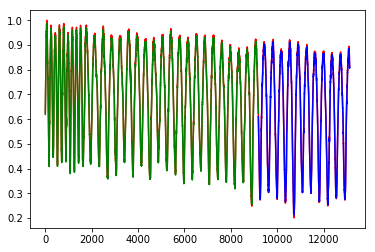

In [80]:
#Plot the data set
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:,0]

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict[:,0]
# plot baseline and predictions
plt.plot(dataset,'r')
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'b')
plt.show()

In [77]:
#Predict the next value with the model
data_x = [0.33, 0.55, 0.77]
x,y = create_dataset(data_x,look_back) #reform the dataset for next sequence
x_t = np.reshape(x,(x.shape[0],1,x.shape[1]))#reshape the data set to fit into the dl_model
y_t = dl_model.predict(x_t)
print(x_t, ' has the predicted next value: ', y_t)

[[[0.33]]]  has the predicted next value:  [[0.32852462]]


In [82]:
!pip install keras
